Mean Squared Error: 0.00


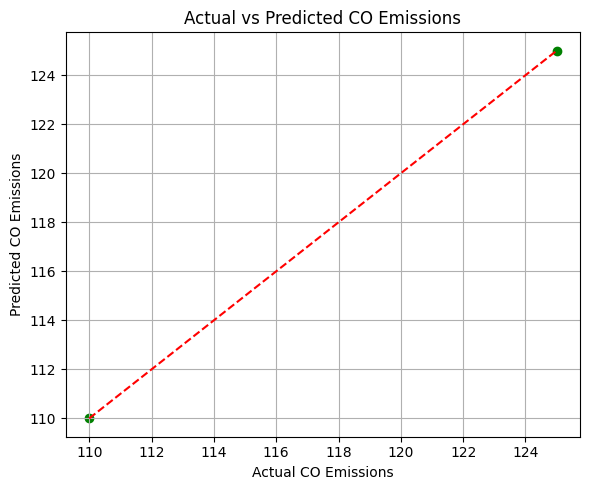

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sample raw data
manufacturers = ['Ford', 'Ford', 'BMW', 'BMW', 'Honda', 'Honda']
fuel_types = ['Petrol', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel']
co_emissions = [120, 115, 130, 125, 110, 105]

# 2. Manual One-Hot Encoding (drop_first=True)
X = []
for i in range(len(manufacturers)):
    row = []
    # Intercept term will be added later
    # Encode manufacturer
    row.append(1 if manufacturers[i] == 'BMW' else 0)
    row.append(1 if manufacturers[i] == 'Honda' else 0)
    # Encode fuel_type
    row.append(1 if fuel_types[i] == 'Diesel' else 0)
    X.append(row)

X = np.array(X)
y = np.array(co_emissions).reshape(-1, 1)

# 3. Add intercept term (column of 1s)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# 4. Manual train-test split (80% train, 20% test)
def split_data(X, y, test_ratio=0.2):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split = int(len(X) * (1 - test_ratio))
    train_idx, test_idx = indices[:split], indices[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = split_data(X, y)

# 5. Train using Normal Equation: β = (XᵀX)^(-1) Xᵀy
beta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

# 6. Predict
y_pred = X_test @ beta

# 7. Compute Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse:.2f}")

# 8. Plot Actual vs Predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual CO Emissions')
plt.ylabel('Predicted CO Emissions')
plt.title('Actual vs Predicted CO Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


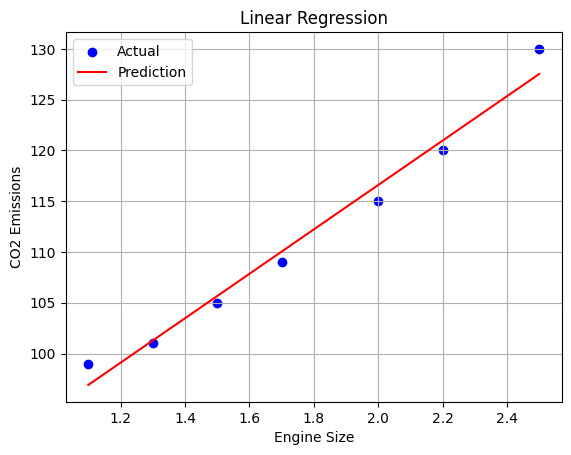

In [22]:
import matplotlib.pyplot as plt

# Step 1: Sample Data (Engine size vs CO2 emissions)
X = [1.1, 1.3, 1.5, 1.7, 2.0, 2.2, 2.5]   # Independent variable
Y = [99, 101, 105, 109, 115, 120, 130]   # Dependent variable

n = len(X)  # Total number of data points

# Step 2: Calculate Mean of X and Y
mean_x = sum(X) / n
mean_y = sum(Y) / n


# Step 3: Calculate slope (b) and intercept (a) using formula
num = 0
den = 0
for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    den += (X[i] - mean_x) ** 2

b = num / den                  # slope
a = mean_y - b * mean_x        # intercept

Y_pred = []
for xi in X:
    Y_pred.append(a + b * xi)

plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Prediction')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Linear Regression")
plt.legend()
plt.grid()
plt.show()